Develop an automated MRI preprocessing system that applies cropping and 2D transformations (rotation, scaling, and shearing) to enhance alignment, remove irrelevant regions, and improve image quality for accurate medical analysis.


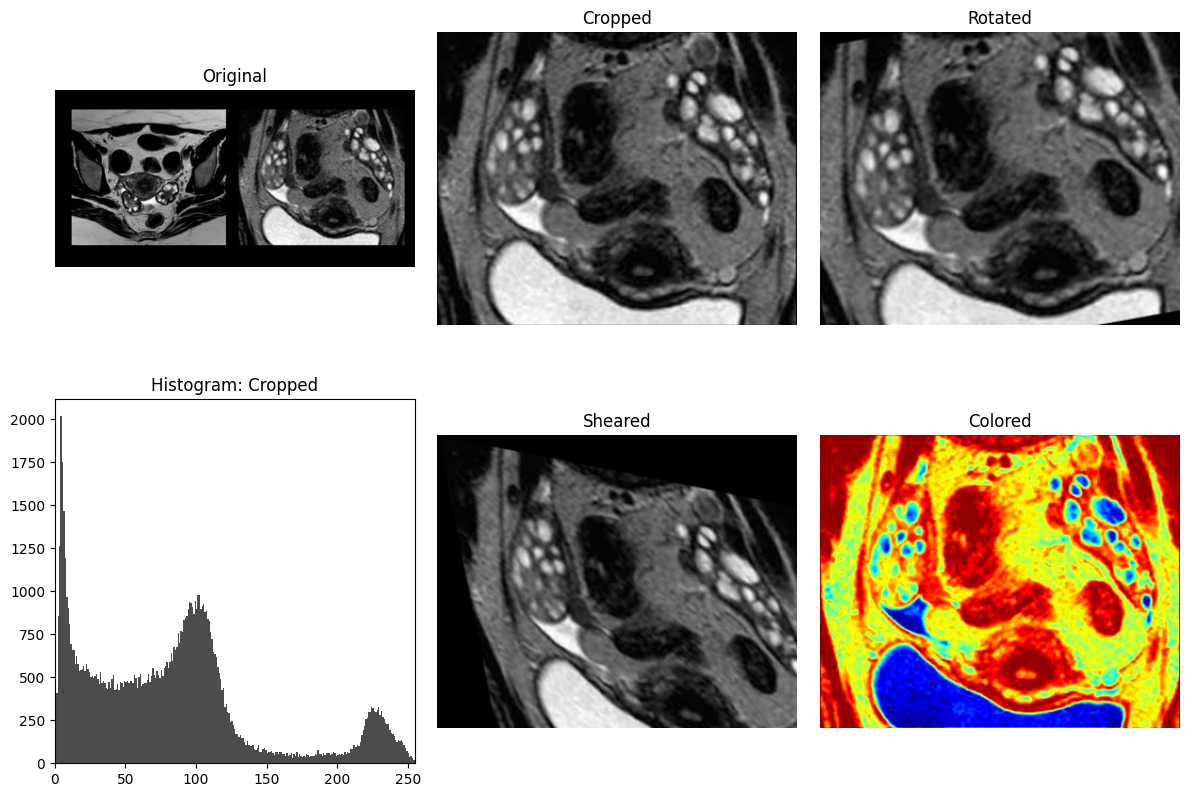

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path='ovaryy.jpg'
img=cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#thresholding
_, thresh = cv2.threshold(img,10,255,cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x,y,w,h = cv2.boundingRect(max(contours,key=cv2.contourArea))
cropped =img[y:y+h,x:x+w]


 #2d transformation
h,w=cropped.shape
center=(w//2,h//2)
#rotation
M_rot=cv2.getRotationMatrix2D(center,10,1.1)
rotated=cv2.warpAffine(cropped,M_rot,(w,h))
#shearing
M_shear=np.float32([[1,0.2,0],[0.2,1,0]])
sheared=cv2.warpAffine(cropped,M_shear,(w,h))

#applying ColorMap from CV2

colored= cv2.applyColorMap(cropped, cv2.COLORMAP_JET)
 #plotting all the images
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.imshow(img,cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(3,3,2)
plt.imshow(cropped,cmap='gray')
plt.title("Cropped")
plt.axis('off')

plt.subplot(3,3,3)
plt.imshow(rotated,cmap='gray')
plt.title("Rotated")
plt.axis('off')



plt.subplot(3, 3, 4)
plt.hist(cropped.ravel(), bins=256, range=(0, 256), color='black', alpha=0.7)
plt.title("Histogram: Cropped")
plt.xlim(0, 255)

plt.tight_layout()

plt.subplot(3,3,5)
plt.imshow(sheared,cmap='gray')
plt.title("Sheared")
plt.axis('off')

plt.subplot(3,3,6)
plt.imshow(colored,cmap='gray')
plt.title("Colored")
plt.axis('off')
plt.show()